In [83]:
using CSV
using Dates
using DelimitedFiles 
using NCDatasets
using PyPlot
using DIVAnd
using Statistics
const plt=PyPlot
using PyCall
using PyPlot
using TOML
using GeoArrays
const plt = PyPlot
colors = PyCall.pyimport("matplotlib.colors")
mticker = PyCall.pyimport("matplotlib.ticker")
cmocean = PyCall.pyimport("cmocean")
plt.rc("font", family="Times New Roman", size=16)
include("../src/InterpCalanus.jl")
include("../src/PlottingCalanus.jl")

Main.PlottingCalanus

In [5]:
config = TOML.parsefile("./config.ini")
dom = config["domain"]

4-element Vector{Float64}:
 -20.5
  11.75
  41.25
  67.0

In [6]:
resdir = config["directories"]["resdir"]
figdir = config["directories"]["figdir"]
isdir("resdir") ? @debug("already there") : mkpath("resdir")
isdir(figdir) ? @debug("already there") : mkpath(figdir)
datadir = config["directories"]["datadir"]
datafile = joinpath(datadir, config["files"]["datafile"])
isfile(datafile) ? @debug("already downloaded") : download(config["files"]["datafileURL"], datafile)

## Reading monthly and yearly results

In [7]:
resfile_yearmonth_fidmarchicus = joinpath(resdir, "calanus_finmarchicus_year_month.nc")
resfile_yearmonth_helgolandicus = joinpath(resdir, "calanus_helgolandicus_year_month.nc")
resfile_year_fidmarchicus = joinpath(resdir, "calanus_finmarchicus_year.nc")
resfile_year_helgolandicus = joinpath(resdir, "calanus_helgolandicus_year.nc")

"../results/L05/calanus_helgolandicus_year.nc"

In [59]:
function read_results(resfile::String)
    NCDataset(resfile, "r") do ds
        lon = ds["lon"][:]
        lat = ds["lat"][:]
        times = ds["time"][:]
        field = ds["abundance"][:]
        error = ds["error"][:]
        
        return lon::Vector{Union{Missing, Float32}}, lat::Vector{Union{Missing, Float32}}, 
            times::Vector{DateTime}, 
            field::Array{Union{Missing, Float64}, 3}, 
            error::Array{Union{Missing, Float64}, 3}
    end
end

read_results (generic function with 1 method)

In [81]:
lonyear_fid, lat_year_fid, times_year, field_year_fid, error_year = read_results(resfile_year_fidmarchicus)
_, _, _, field_year_helgo, _ = read_results(resfile_year_helgolandicus);
_, _, times_month, field_yearmonth_fid, error_month = read_results(resfile_yearmonth_fidmarchicus);
_, _, _, field_yearmonth_helgo, _ = read_results(resfile_yearmonth_helgolandicus);

In [79]:
function compute_time_mean(field::Array{Union{Missing, Float64}, 3})
    nlon, nlat, ntimes = size(field)
    fieldmean = zeros(ntimes)
    for itt = 1:ntimes
        fieldmean[itt] = mean(filter(!isnan, field[:,:,itt]))
    end
    return fieldmean
end

compute_time_mean (generic function with 1 method)

In [87]:
fmean1 = compute_time_mean(field_year_fid)
fmean2 = compute_time_mean(field_year_helgo)
fmean3 = compute_time_mean(field_yearmonth_fid)
fmean4 = compute_time_mean(field_yearmonth_helgo)

Float64[]

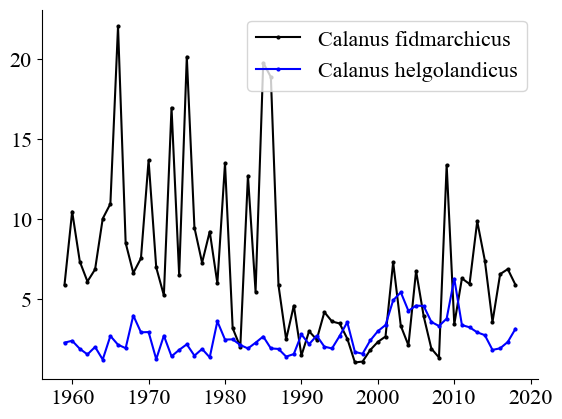

PyObject <matplotlib.legend.Legend object at 0x7fba722f56a0>

In [93]:
fig = plt.figure()
ax = plt.subplot(111)
ax.spines["top"].set_visible(false)
ax.spines["right"].set_visible(false)
ax.plot(times_year, fmean1, "ko-", markersize=2, label="Calanus fidmarchicus")
ax.plot(times_year, fmean2, "bo-", markersize=2, label="Calanus helgolandicus")
plt.legend()